In [1]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
from math import log,sqrt,pi

Processed 189 lines.
['/controls/flight/elevator', '/velocities/vertical-speed-fps']


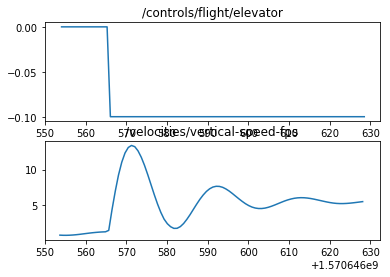

In [2]:
%run fgplot.py fglog191009194233.csv

In [3]:
p1 = 13.4
p2 = 7.6
y0 = 1.2
yss = 5.5
uss = -0.1
T = 93-72

In [4]:
logdec = log((p1-yss)/(p2-yss))
print('logdec=',logdec)
zeta = 1/sqrt(1+(2*pi/logdec)**2)
print('zeta=',zeta)
wd = 2*pi/T
print('wd=',wd)
wn = wd/sqrt(1-zeta**2)
print('wn=',wn)
k = (yss-y0)/uss
print('k=',k)

logdec= 1.3249254147435987
zeta= 0.2063310147175011
wd= 0.2991993003418851
wn= 0.30577897609210164
k= -42.99999999999999


In [23]:
A = np.array([[0,1],[-wn*wn,-2*zeta*wn]])
B = np.array([[0],[1]])
C = np.array([[-k*wn*wn,0]])
D = np.array([0])
(A,B,C,D)

(array([[ 0.        ,  1.        ],
        [-0.09350078, -0.12618337]]), array([[0],
        [1]]), array([[4.02053364, 0.        ]]), array([0]))

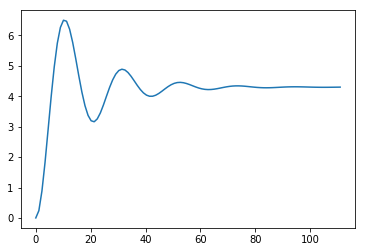

In [6]:
(t,y) = scipy.signal.step((A,B,C,D))
plt.plot(t,y*-uss)
plt.show()

In [7]:
w,v = np.linalg.eig(A)
w

array([-0.06309169+0.2991993j, -0.06309169-0.2991993j])

In [57]:
kp = 0.022266
Acl = A+kp*np.dot(B,C)
Bcl = kp*B
w,v = np.linalg.eig(Acl)
w

array([-0.06210143, -0.06408194])

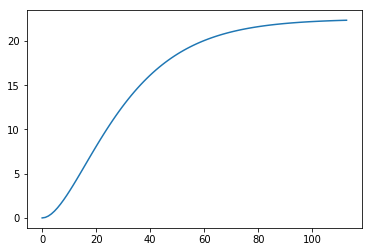

In [58]:
(t,y) = scipy.signal.step((Acl,Bcl,C,D))
plt.plot(t,y)
plt.show()

Processed 285 lines.
['/controls/flight/elevator', '/velocities/vertical-speed-fps']


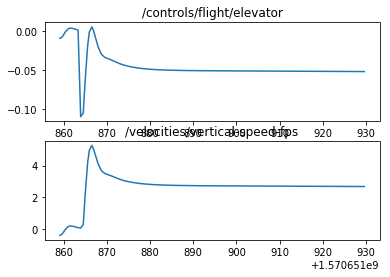

In [59]:
%run fgplot.py fglog191009211058.csv

In [13]:
Aaug = np.vstack(([0,1,0],np.hstack((np.zeros((2,1)),A))))
Aaug

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        , -0.09350078, -0.12618337]])